Step1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import pywt
from scipy import linalg

Step2: Save the cover image with the secret image embedded in it in the same directory with name img and resize it to 250*250

In [2]:
secret_path=!ls img_with_secret*
cover_path=!ls cover_img*
resultimg=cv2.imread(secret_path[0])
resultimg=cv2.resize(resultimg,(250,250))
img=cv2.imread(cover_path[0])
img=cv2.resize(img,(250,250))

Step3: Split cover image into RGB

In [3]:
bimg=img[:,:,0]
gimg=img[:,:,1]
rimg=img[:,:,2]

Step4: Split image with secret messahe into RGB

In [4]:
resultbimg=resultimg[:,:,0]
resultgimg=resultimg[:,:,1]
resultrimg=resultimg[:,:,2]

Step5: Split into sub-bands using 2-D Haar Transform

In [5]:
bLL,(bLH,bHL,bHH)=pywt.dwt2(bimg,'haar')
gLL,(gLH,gHL,gHH)=pywt.dwt2(gimg,'haar')
rLL,(rLH,rHL,rHH)=pywt.dwt2(rimg,'haar')
biLL,(biLH,biHL,biHH)=pywt.dwt2(resultbimg,'haar')
giLL,(giLH,giHL,giHH)=pywt.dwt2(resultgimg,'haar')
riLL,(riLH,riHL,riHH)=pywt.dwt2(resultrimg,'haar')

Step6: Retrieve the secret image sub-bands

In [6]:
hbiLL=(biLL-(0.9*bLL))/0.1
hgiLL=(giLL-(0.9*gLL))/0.1
hriLL=(riLL-(0.9*rLL))/0.1

Step7: Merge the sub-bands

In [7]:
coeffhb=hbiLL,(biLH,biHL,biHH)
resulthbimg=pywt.idwt2(coeffhb,'haar')
coeffhg=hgiLL,(giLH,giHL,giHH)
resulthgimg=pywt.idwt2(coeffhg,'haar')
coeffhr=hriLL,(riLH,riHL,riHH)
resulthrimg=pywt.idwt2(coeffhr,'haar')

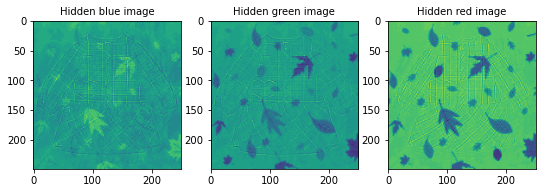

In [8]:
titles = ['Hidden blue image', 'Hidden green image','Hidden red image']
fig = plt.figure(figsize=(9, 3))
for i, a in enumerate([resulthbimg, resulthgimg,resulthrimg]):
    ax = fig.add_subplot(1, 3, i + 1)
    plt.imshow(a)
    ax.set_title(titles[i], fontsize=10)

Step8: Write the secret image

In [9]:
blankimg=np.zeros((250,250,3))
blankimg[:,:,0]=resulthbimg
blankimg[:,:,1]=resulthgimg
blankimg[:,:,2]=resulthrimg
cv2.imwrite("secret_img.png",blankimg)

True